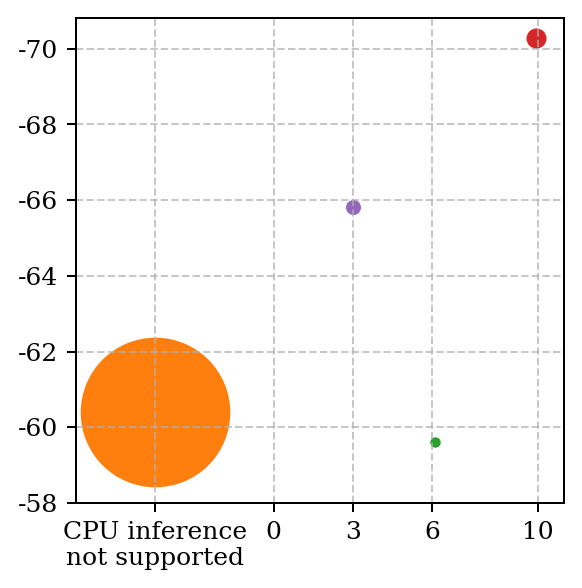

In [1]:
import matplotlib.pyplot as plt, numpy as np

encoders = ["", "Cosmos", "WaLLoC", "LiVeAction", "AVIF"]
throughput = [None, -4.5, 6.12, 9.95, 3.0123]
bd_ssim_rate  = np.array([0, -29.9439, -57.5230, -70.2994, -71.0959])
bd_psnr_rate  = np.array([0, +49.6106, -27.6079, -36.5547, -64.0286])
bd_dists_rate = np.array([0, -90.8796, -61.7135, -70.2706, -60.5623])
bd_rate = (1/2)*(bd_ssim_rate + bd_dists_rate)

sizes = np.array([0, 34.621, 0.009264, 0.493, 0.25])
sizes[2] = 0.1 # too small to see otherwise
sizes = 100*sizes
plt.rcParams["font.family"] = "serif"

plt.figure(figsize=(3.5, 3.5), dpi=180)

for i in range(5):
    plt.scatter(throughput[i], bd_rate[i], s=sizes[i], label=encoders[i])


plt.xlim([-7.5,11])

ticks = [-58, -60, -62, -64, -66, -68, -70]
plt.yticks(ticks, labels=[str(t) for t in ticks])

ticks = [-4.5, 0, 3, 6, 10]
plt.xticks(ticks)
plt.gca().set_xticklabels(['CPU inference\nnot supported'] + [str(t) for t in ticks[1:]], ha='center')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.savefig('tp_vs_bd.svg')